In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

In [2]:
data = pd.read_csv('onlinefoods.csv')
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


<li>Age: Возраст покупателя.</li>
<li>Gender: Пол покупателя.</li>
<li>Marital Status: Супружеский статус покупателя.</li>
<li>Occupation: Профессия покупателя.</li>
<li>Monthly Income: Ежемесячный доход покупателя.</li>
<li>Educational Qualifications: Уровень образования покупателя.</li>
<li>Family Size: Количество членов семьи.</li>
<li>Latitude: Широта местонахождения покупателя.</li>
<li>Longitude: Долгота местонахождения покупателя.</li>
<li>Pin Code: Почтовый индекс покупателя.</li>
<li>Output: Текущий статус заказа (доставлен, ожидание, отклонен).</li>
<li>Feedback: Отзыв покупателя после получения заказа.</li>

In [232]:
data.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [234]:
data.shape

(388, 13)

In [3]:
data.drop(columns='Unnamed: 12', inplace=True)

C:\Users\Ксения\AppData\Local\Temp\ipykernel_12940\3602848586.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


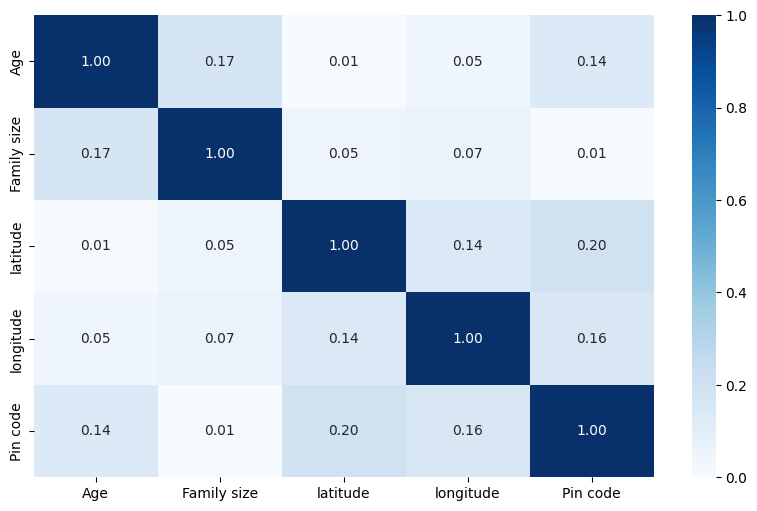

In [4]:
corr = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(abs(corr), annot=True, fmt='.2f', cmap='Blues', vmin=0, vmax=1)
plt.show()

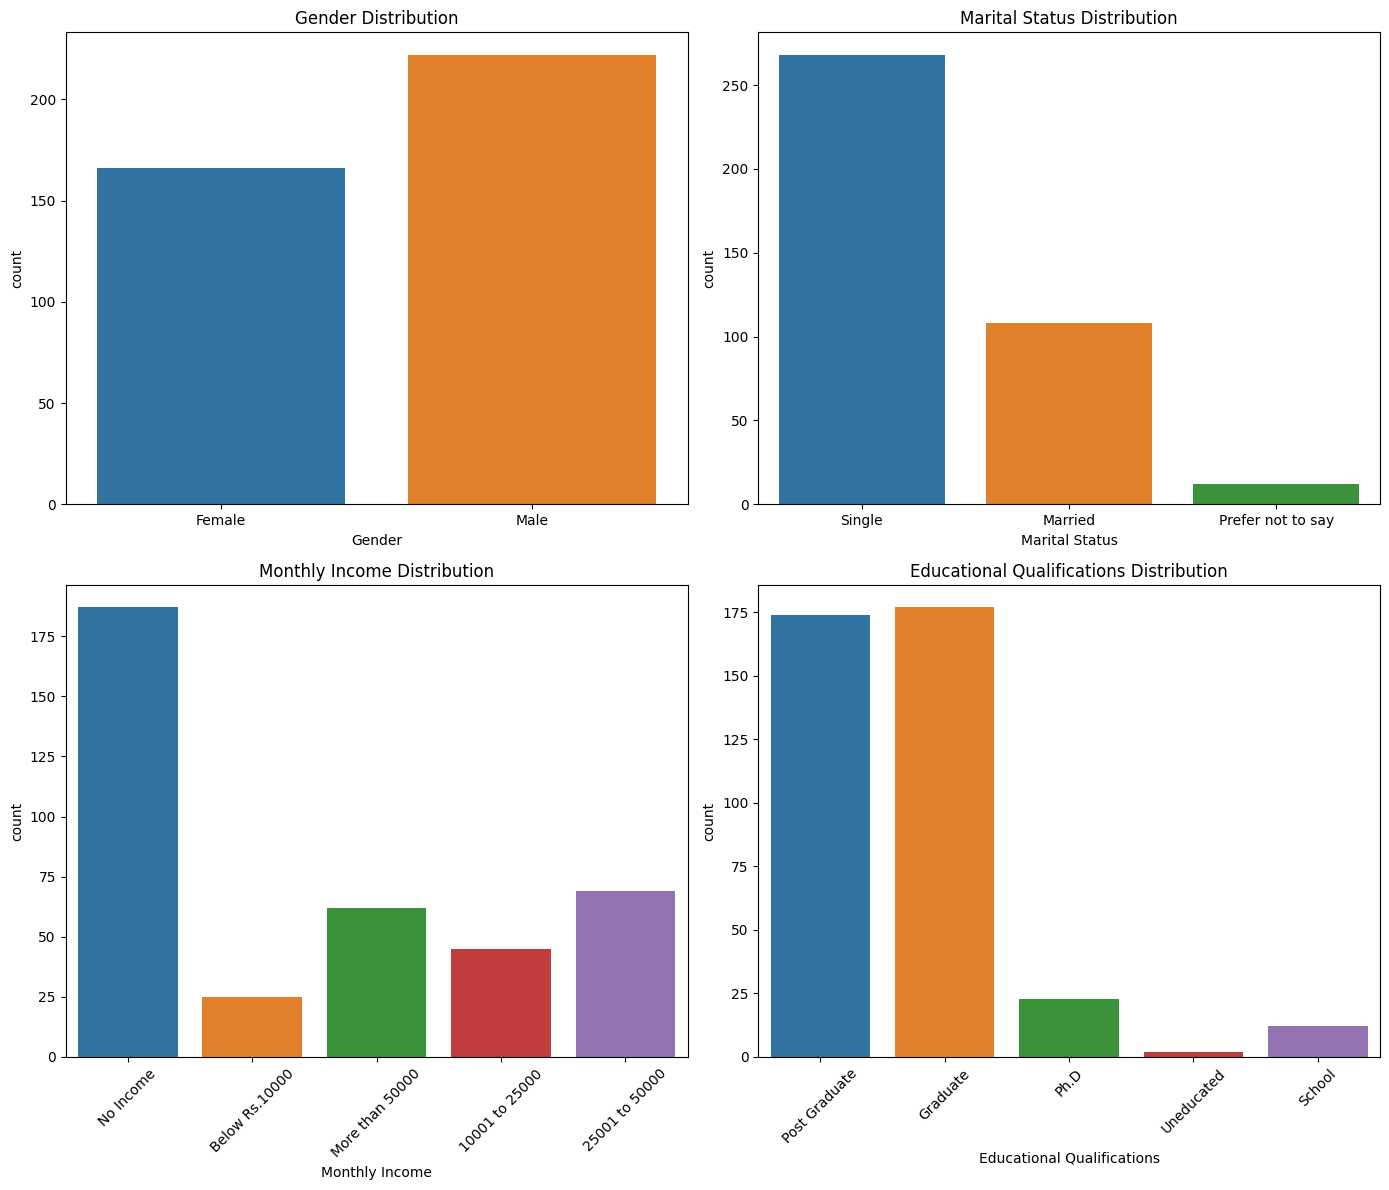

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.countplot(x='Gender', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

sns.countplot(x='Marital Status', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Marital Status Distribution')

sns.countplot(x='Monthly Income', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Monthly Income Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(x='Educational Qualifications', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Educational Qualifications Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

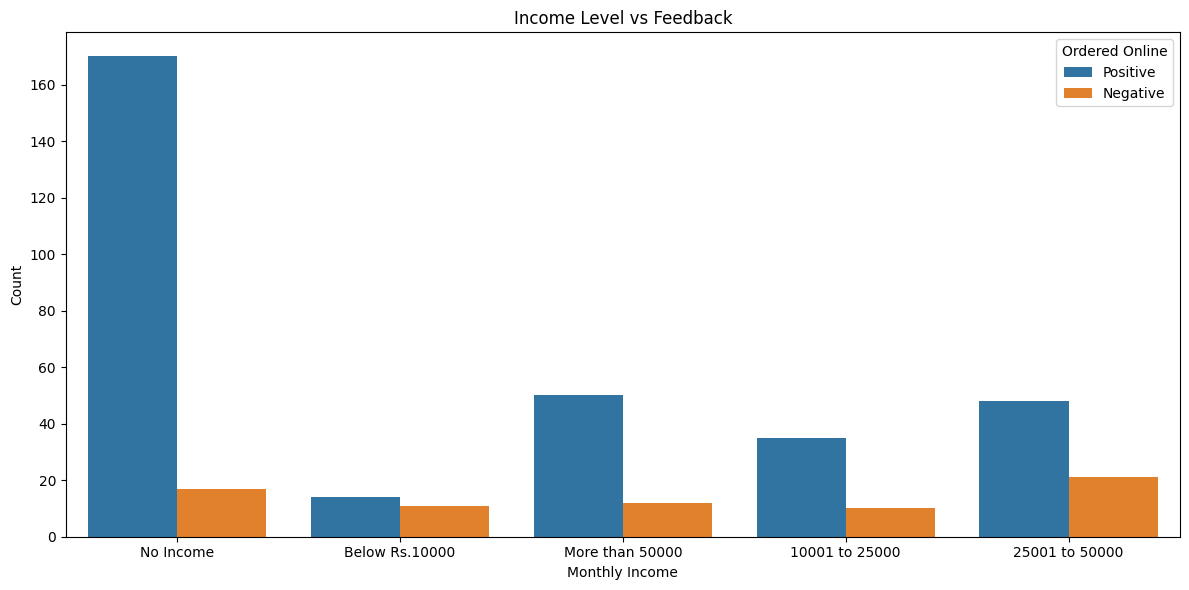

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Monthly Income', hue='Feedback', data=data)
plt.title('Income Level vs Feedback')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.legend(title='Ordered Online')
plt.tight_layout()
plt.show()

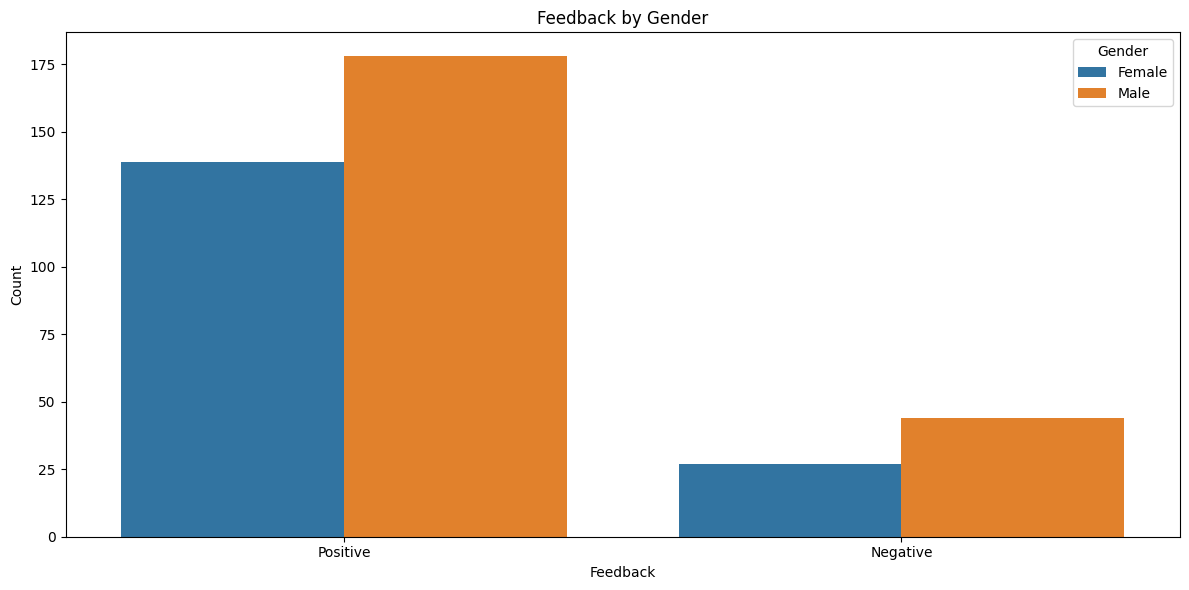

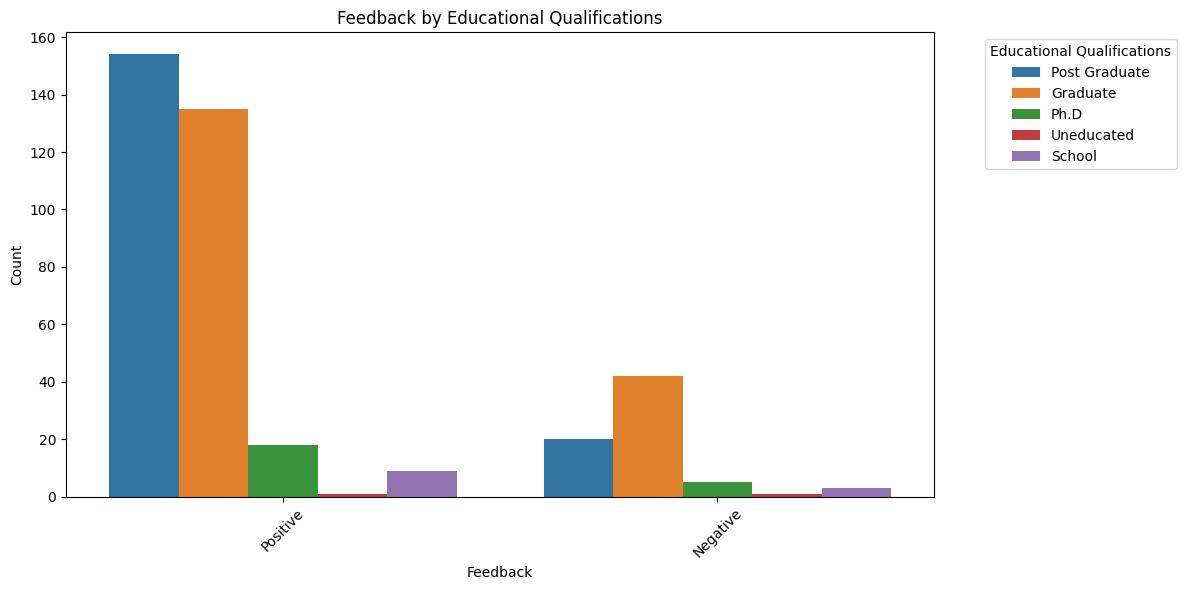

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Feedback', hue='Gender', data=data)
plt.title('Feedback by Gender')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Feedback', hue='Educational Qualifications', data=data)
plt.title('Feedback by Educational Qualifications')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.legend(title='Educational Qualifications', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

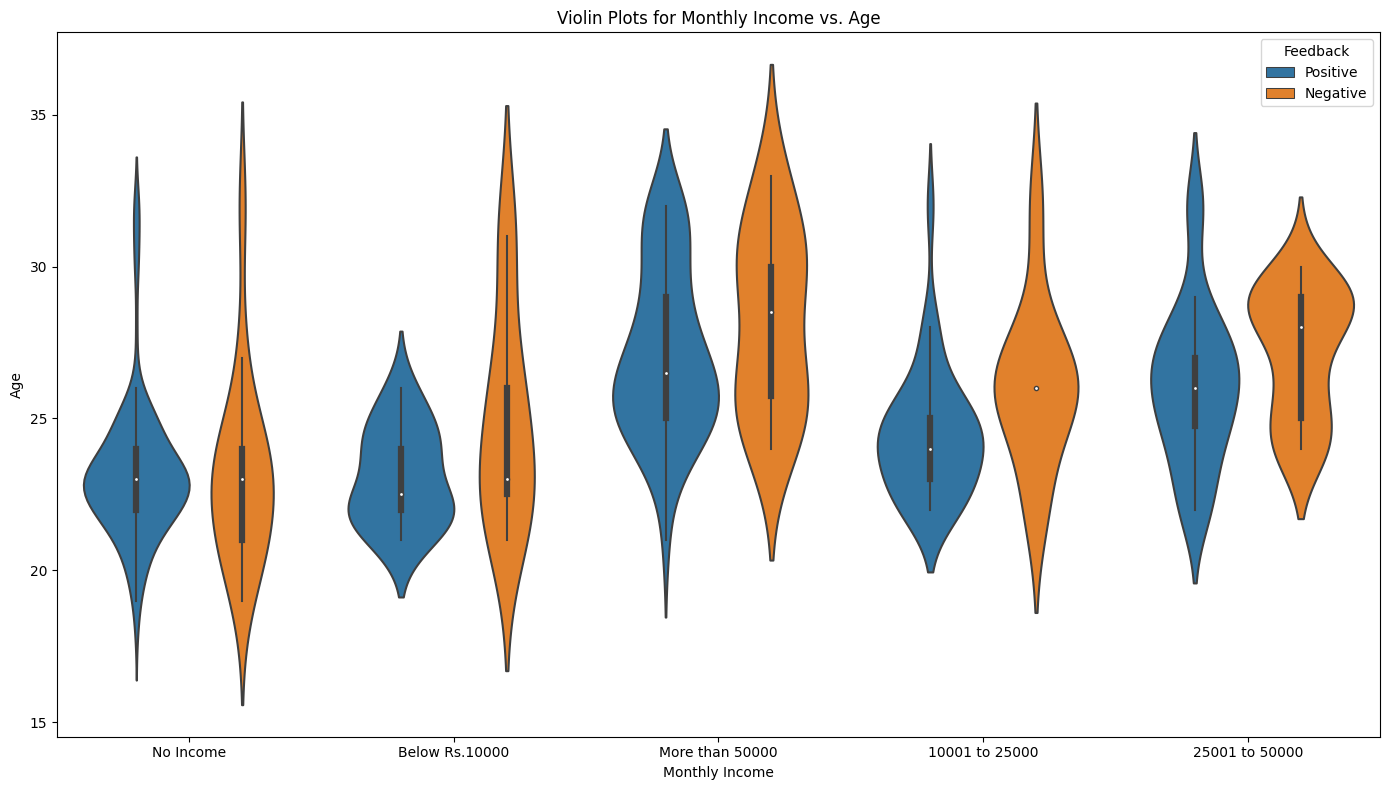

In [12]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Monthly Income', y='Age', hue='Feedback', data=data)
plt.title('Violin Plots for Monthly Income vs. Age')
plt.xlabel('Monthly Income')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

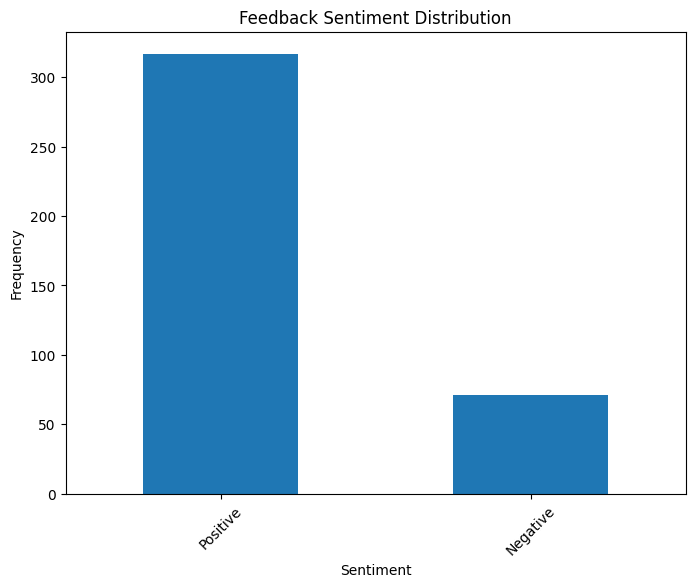

Positive    317
Negative     71
Name: Feedback, dtype: int64

In [13]:
sentiment_counts = data['Feedback'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Feedback Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

sentiment_counts

### Сильно выраженный дисбаланс целевых данных.

In [5]:
print(data['Marital Status'].unique())
print(data['Occupation'].unique())
print(data['Educational Qualifications'].unique())
print(data['Monthly Income'].unique())
print(data['Output'].unique())
print(data['Feedback'].unique())
print(data['Gender'].unique())

['Single' 'Married' 'Prefer not to say']
['Student' 'Employee' 'Self Employeed' 'House wife']
['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']
['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
['Yes' 'No']
['Positive' 'Negative']
['Female' 'Male']


# Вариант 1. Разделение столбцов Marital Status, Occupation, Educational Qualifications на столбцы по их значениям (One-hot encoding). Замена Yes, No на 1 и 0. Замена Female: 0, Male: 1. Замена Negative: 0, Positive: 1. Замена Monthly Income на средние численные значения. 
### Удаление сильно коррелирующих столбцов: Marital Status_Single, Marital Status_Prefer not to say, Educational Qualifications_Post Graduate.
### Обучение метода случайного леса, деревьвев решений и логистической регрессии на полученных данных. 

In [6]:
data_new = pd.get_dummies(data, columns=['Marital Status', 'Occupation', 'Educational Qualifications'])

In [7]:
data_new = data_new.replace({'Yes': 1, 'No': 0})
data_new['Gender'] = data_new['Gender'].replace({'Female': 0, 'Male': 1})
data_new['Feedback'] = data_new['Feedback'].replace({'Negative': 0, 'Positive': 1})
data_new['Monthly Income'] = data_new['Monthly Income'].replace({'No Income': 0, 'Below Rs.10000': 10000, 'More than 50000': 50000, 
              '10001 to 25000': 17500, '25001 to 50000': 37500})

In [8]:
data_new.head()

,Age,Gender,Monthly Income,Family size,latitude,longitude,Pin code,Output,Feedback,Marital Status_Married,...,Marital Status_Single,Occupation_Employee,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Educational Qualifications_Graduate,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated
0,20,0,0,4,12.9766,77.5993,560001,1,1,0,...,1,0,0,0,1,0,0,1,0,0
1,24,0,10000,3,12.9770,77.5773,560009,1,1,0,...,1,0,0,0,1,1,0,0,0,0
2,22,1,10000,3,12.9551,77.6593,560017,1,0,0,...,1,0,0,0,1,0,0,1,0,0
3,22,0,0,6,12.9473,77.5616,560019,1,1,0,...,1,0,0,0,1,1,0,0,0,0
4,22,1,10000,4,12.9850,77.5533,560010,1,1,0,...,1,0,0,0,1,0,0,1,0,0


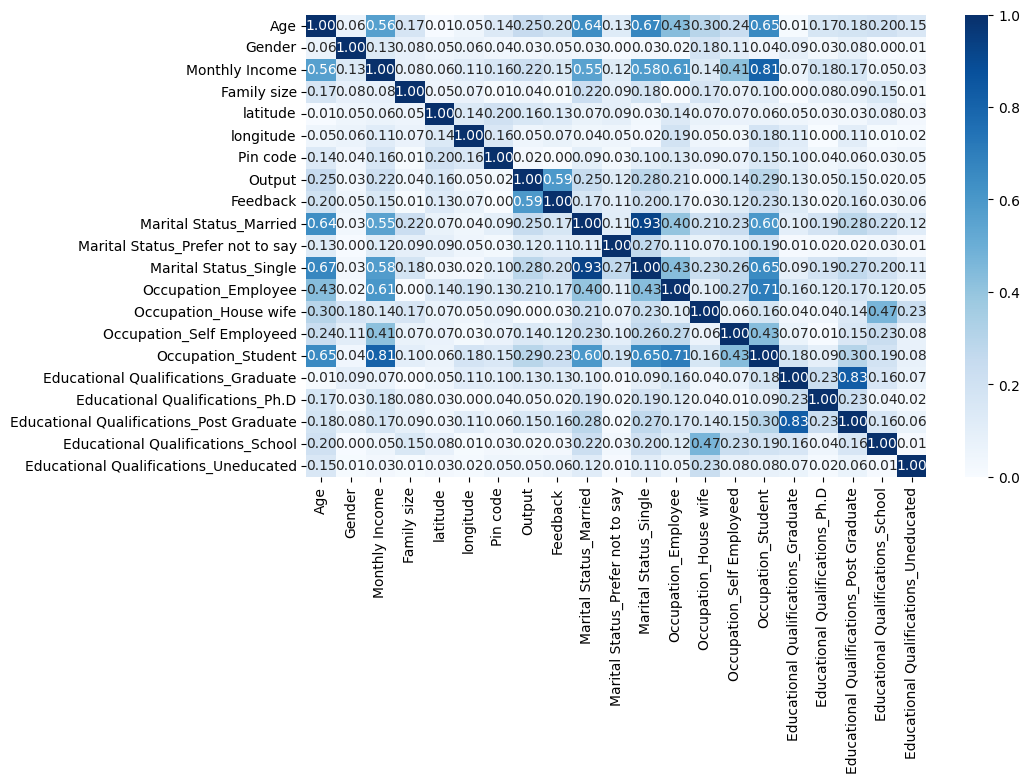

In [241]:
corr = data_new.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(abs(corr), annot=True, fmt='.2f', cmap='Blues', vmin=0, vmax=1)
plt.show()

### Столбцы Married и Single являются взаимоисключающими, поэтому имеют сильную корреляцию. Есть смысл удалить столбцы Prefer_not_to_say и Single. То же самое и со столбцом Post Graduate.

In [9]:
data_new = data_new.drop(columns=['Educational Qualifications_Post Graduate'])

In [10]:
data_new = data_new.drop(columns=['latitude', 'longitude', 'Pin code'])

In [11]:
X = data_new.drop(['Feedback'], axis=1)
y = data_new['Feedback']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
rf_model = RandomForestClassifier(n_estimators=5, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
report_rf = classification_report(y_test, y_pred)

print(accuracy_rf)
print(report_rf)

0.8461538461538461
              precision    recall  f1-score   support

           0       0.45      0.45      0.45        11
           1       0.91      0.91      0.91        67

    accuracy                           0.85        78
   macro avg       0.68      0.68      0.68        78
weighted avg       0.85      0.85      0.85        78



In [14]:
models = {
    "Random Forest Classifier": RandomForestClassifier(n_estimators=5, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='poly')
}

model_list = []
accuracy_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    model_list.append(model_name)
    accuracy_list.append(test_accuracy)
    
    print(model_name)
    print("Train Accuracy: {:.4f}".format(train_accuracy))
    print("Test Accuracy: {:.4f}".format(test_accuracy))
    print('\n')

Random Forest Classifier
Train Accuracy: 0.9645
Test Accuracy: 0.8462


Decision Tree Classifier
Train Accuracy: 0.9839
Test Accuracy: 0.8718


Logistic Regression
Train Accuracy: 0.8065
Test Accuracy: 0.8590


SVM
Train Accuracy: 0.8065
Test Accuracy: 0.8590




In [15]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=16))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                340       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [251]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
tb_callback_1 = TensorBoard(log_dir='./logs5', histogram_freq=1)
model.fit(X_train, y_train, epochs=30, callbacks=[tb_callback_1], validation_data=(X_test, y_test))

Epoch 1/30


10/10 [==============================] - 2s 16ms/step - loss: 1198.1157 - accuracy: 0.8065 - val_loss: 770.4951 - val_accuracy: 0.8590
Epoch 2/30
10/10 [==============================] - 0s 7ms/step - loss: 966.7348 - accuracy: 0.8065 - val_loss: 597.6642 - val_accuracy: 0.8590
Epoch 3/30
10/10 [==============================] - 0s 6ms/step - loss: 729.7115 - accuracy: 0.8065 - val_loss: 436.9847 - val_accuracy: 0.8590
Epoch 4/30
10/10 [==============================] - 0s 6ms/step - loss: 496.3810 - accuracy: 0.8065 - val_loss: 281.1750 - val_accuracy: 0.8590
Epoch 5/30
10/10 [==============================] - 0s 6ms/step - loss: 299.7477 - accuracy: 0.8065 - val_loss: 115.6018 - val_accuracy: 0.8590
Epoch 6/30
10/10 [==============================] - 0s 6ms/step - loss: 81.1509 - accuracy: 0.7581 - val_loss: 52.0942 - val_accuracy: 0.6795
Epoch 7/30
10/10 [==============================] - 0s 6ms/step - loss: 35.2358 - accuracy: 0.7065 - val_loss: 27.8883 - val_accuracy: 0.8590
Epoch

In [252]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

3/3 [==============================] - 0s 2ms/step - loss: 12.2235 - accuracy: 0.8590
Test accuracy: 0.8589743375778198


### Результаты обучения 
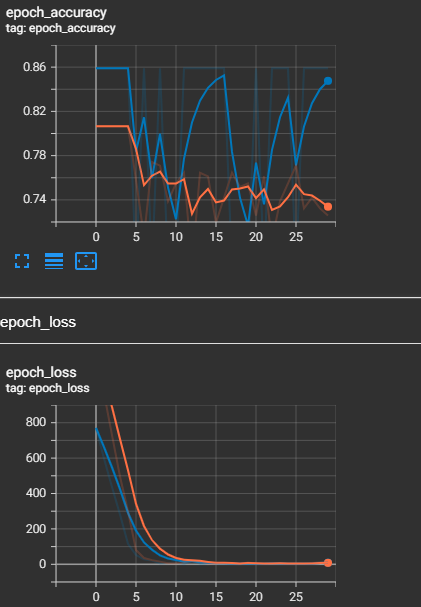

# Вариант 2. Обучение метода случайного леса и деревьев принятия решений с помощью LabelEncoder().

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

In [18]:
data_2 = data.drop(columns=['latitude', 'longitude', 'Pin code'])

In [19]:
encoder = LabelEncoder()
categorical_features = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output']
for feature in categorical_features:
    data_2[feature] = encoder.fit_transform(data_2[feature])

In [20]:
X = data_2.drop(['Feedback'], axis=1)
y = encoder.fit_transform(data_2['Feedback'])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
rf_model = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=2)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
report_rf = classification_report(y_test, y_pred)

print(accuracy_rf)
print(report_rf)

0.8717948717948718
              precision    recall  f1-score   support

           0       0.67      0.18      0.29        11
           1       0.88      0.99      0.93        67

    accuracy                           0.87        78
   macro avg       0.77      0.58      0.61        78
weighted avg       0.85      0.87      0.84        78



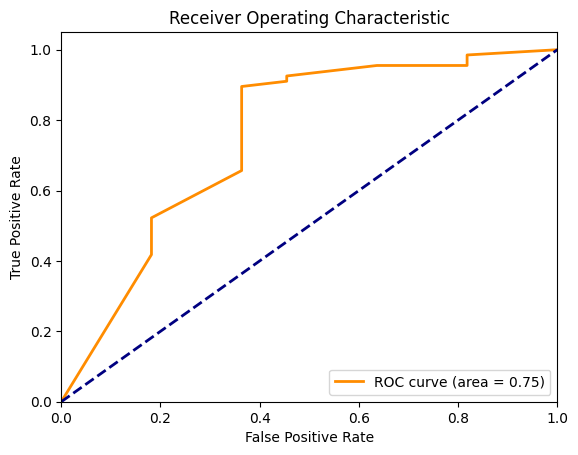

In [23]:
probs_rf = rf_model.predict_proba(X_test)
probs_rf = probs_rf[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probs_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [24]:
dt_model = DecisionTreeClassifier(criterion='log_loss', max_depth=2, splitter='best', max_features='log2')
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)
report_dt = classification_report(y_test, y_pred)

print(accuracy_dt)
print(report_dt)

0.8333333333333334
              precision    recall  f1-score   support

           0       0.25      0.09      0.13        11
           1       0.86      0.96      0.91        67

    accuracy                           0.83        78
   macro avg       0.56      0.52      0.52        78
weighted avg       0.78      0.83      0.80        78



In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 2, 3, 4, 5],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [2, 4, 10, 20, 42]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

dt_model = DecisionTreeClassifier(**best_params)
dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred)
report_dt = classification_report(y_test, y_pred)

print(accuracy_dt)
print(report_dt)


0.8589743589743589
              precision    recall  f1-score   support

           0       0.50      0.55      0.52        11
           1       0.92      0.91      0.92        67

    accuracy                           0.86        78
   macro avg       0.71      0.73      0.72        78
weighted avg       0.86      0.86      0.86        78



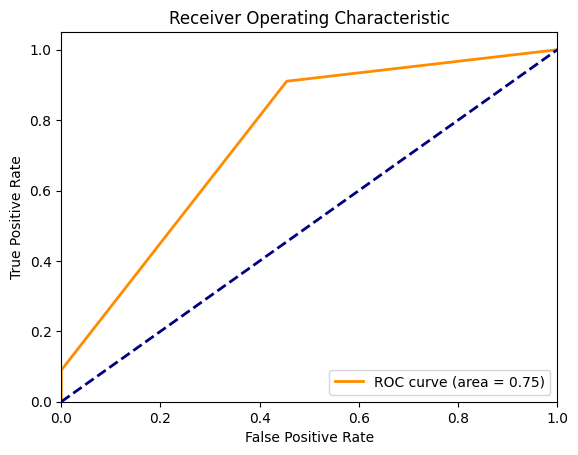

In [26]:
probs_dt = dt_model.predict_proba(X_test)
probs_dt = probs_dt[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probs_dt)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Вариант 3. Сбалансированный датасет с помощью RandomOverSampler

In [27]:
from imblearn.over_sampling import RandomOverSampler

In [28]:
X = data_2.drop(['Feedback'], axis=1)
y = encoder.fit_transform(data_2['Feedback'])

oversample=RandomOverSampler(sampling_strategy='minority')
x_resamled, y_resampled = oversample.fit_resample(X, y)

In [37]:
X.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Output'],
      dtype='object')

In [29]:
cols = ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Output', 'Feedback']
data_balanced = pd.DataFrame(np.column_stack((x_resamled, y_resampled)), columns=cols)

print(data_balanced.shape)

(634, 9)


In [30]:
data_balanced['Feedback'].value_counts()

1    317
0    317
Name: Feedback, dtype: int64

<Axes: xlabel='Feedback', ylabel='count'>

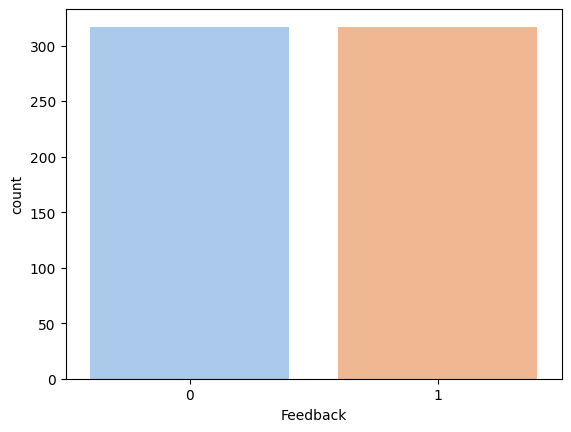

In [40]:
sns.countplot(x='Feedback',data=data_balanced,palette='pastel')

In [31]:
y = data_balanced['Feedback']
X = data_balanced.drop(['Feedback'], axis=1)
X.shape

(634, 8)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((507, 8), (127, 8))

In [33]:
rf_model = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=2)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
report_rf = classification_report(y_test, y_pred)

print(accuracy_rf)
print(report_rf)

0.8346456692913385
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        59
           1       0.84      0.85      0.85        68

    accuracy                           0.83       127
   macro avg       0.83      0.83      0.83       127
weighted avg       0.83      0.83      0.83       127



In [34]:
param_grid = {
    'n_estimators': [5, 20, 50, 100],
    'criterion': ['gini', 'log_loss', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [2, 4, 10, 20, 42],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier()

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

rf_model = RandomForestClassifier(**best_params)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
report_rf = classification_report(y_test, y_pred)

print(accuracy_rf)
print(report_rf)

0.9291338582677166
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        59
           1       1.00      0.87      0.93        68

    accuracy                           0.93       127
   macro avg       0.93      0.93      0.93       127
weighted avg       0.94      0.93      0.93       127



In [35]:
best_params

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'random_state': 10}

In [36]:
dt_model = DecisionTreeClassifier(criterion='log_loss', max_depth=2, splitter='best', max_features='log2')
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)
report_dt = classification_report(y_test, y_pred)

print(accuracy_dt)
print(report_dt)

0.8346456692913385
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        59
           1       0.83      0.87      0.85        68

    accuracy                           0.83       127
   macro avg       0.84      0.83      0.83       127
weighted avg       0.83      0.83      0.83       127



In [37]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 2, 3, 4, 5],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [2, 4, 10, 20, 42]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

dt_model = DecisionTreeClassifier(**best_params)
dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred)
report_dt = classification_report(y_test, y_pred)

print(accuracy_dt)
print(report_dt)

0.937007874015748
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        59
           1       1.00      0.88      0.94        68

    accuracy                           0.94       127
   macro avg       0.94      0.94      0.94       127
weighted avg       0.94      0.94      0.94       127



In [38]:
best_params

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'random_state': 20,
 'splitter': 'random'}

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
report_svm = classification_report(y_test, y_pred)
conf_svm = confusion_matrix(y_test, y_pred)

print(accuracy_svm)
print(report_svm)

0.8346456692913385
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        59
           1       0.83      0.87      0.85        68

    accuracy                           0.83       127
   macro avg       0.84      0.83      0.83       127
weighted avg       0.83      0.83      0.83       127



In [41]:
print(conf_svm)

[[47 12]
 [ 9 59]]


In [42]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred)
report_lr = classification_report(y_test, y_pred)
conf_lr = confusion_matrix(y_test, y_pred)

print(accuracy_lr)
print(report_lr)
print(conf_lr)

0.8346456692913385
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        59
           1       0.83      0.87      0.85        68

    accuracy                           0.83       127
   macro avg       0.84      0.83      0.83       127
weighted avg       0.83      0.83      0.83       127

[[47 12]
 [ 9 59]]


In [255]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=16))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
tb_callback_1 = TensorBoard(log_dir='./logs6', histogram_freq=1)
model.fit(X_train, y_train, epochs=30, callbacks=[tb_callback_1], validation_data=(X_test, y_test))

Epoch 1/30


10/10 [==============================] - 0s 16ms/step - loss: 1463.1304 - accuracy: 0.4065 - val_loss: 1009.1086 - val_accuracy: 0.6667
Epoch 2/30
10/10 [==============================] - 0s 7ms/step - loss: 1317.6702 - accuracy: 0.5516 - val_loss: 900.9030 - val_accuracy: 0.6795
Epoch 3/30
10/10 [==============================] - 0s 7ms/step - loss: 1169.6016 - accuracy: 0.5516 - val_loss: 798.7864 - val_accuracy: 0.6795
Epoch 4/30
10/10 [==============================] - 0s 7ms/step - loss: 1036.8424 - accuracy: 0.5516 - val_loss: 697.7001 - val_accuracy: 0.6795
Epoch 5/30
10/10 [==============================] - 0s 7ms/step - loss: 897.2036 - accuracy: 0.5516 - val_loss: 602.6194 - val_accuracy: 0.6795
Epoch 6/30
10/10 [==============================] - 0s 7ms/step - loss: 768.9927 - accuracy: 0.5516 - val_loss: 505.6305 - val_accuracy: 0.6795
Epoch 7/30
10/10 [==============================] - 0s 6ms/step - loss: 634.6301 - accuracy: 0.5516 - val_loss: 407.3386 - val_accuracy: 0.67

In [256]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

3/3 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.8590
Test accuracy: 0.8589743375778198


### Результаты обучения
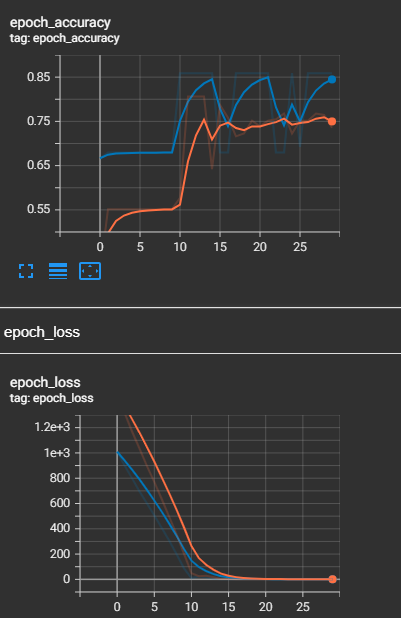

# Вариант 4. StandartScaler() и LabelEncoder() и RandomOverSampler() и удалением дубликатов

In [43]:
from sklearn.preprocessing import StandardScaler

In [45]:
data_4 = data.drop(columns=['latitude', 'longitude', 'Pin code'])

In [46]:
data_4 = data_4.drop_duplicates()

In [47]:
encoder = LabelEncoder()
categorical_features = ['Marital Status', 'Occupation', 'Educational Qualifications', 'Output']
for feature in categorical_features:
    data_4[feature] = encoder.fit_transform(data_4[feature])

In [48]:
data_4 = data_4.replace({'Yes': 1, 'No': 0})
data_4['Gender'] = data_4['Gender'].replace({'Female': 0, 'Male': 1})
data_4['Feedback'] = data_4['Feedback'].replace({'Negative': 0, 'Positive': 1})
data_4['Monthly Income'] = data_4['Monthly Income'].replace({'No Income': 0, 'Below Rs.10000': 10000, 'More than 50000': 50000, 
              '10001 to 25000': 17500, '25001 to 50000': 37500})

In [49]:
X = data_4.drop(['Feedback'], axis=1)
y = encoder.fit_transform(data_4['Feedback'])

In [50]:
data_4.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Output,Feedback
0,20,0,2,3,0,2,4,1,1
1,24,0,2,3,10000,0,3,1,1
2,22,1,2,3,10000,2,3,1,0
3,22,0,2,3,0,0,6,1,1
4,22,1,2,3,10000,2,4,1,1


In [51]:
scaler = StandardScaler()

X_scaled = X.copy()
columns_to_scale = ['Age', 'Monthly Income', 'Family size', 'Educational Qualifications', 'Occupation', 'Marital Status']
for column in columns_to_scale:
    X_scaled[column] = scaler.fit_transform(X[[column]])

In [52]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Output
0,-1.600724,0,0.783476,1.00484,-1.036343,0.901530,0.500118,1
1,-0.316988,0,0.783476,1.00484,-0.534123,-0.994792,-0.209352,1
2,-0.958856,1,0.783476,1.00484,-0.534123,0.901530,-0.209352,1
3,-0.958856,0,0.783476,1.00484,-1.036343,-0.994792,1.919059,1
4,-0.958856,1,0.783476,1.00484,-0.534123,0.901530,0.500118,1


In [53]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_resamled, y_resampled = oversample.fit_resample(X_scaled, y)

cols = ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Output', 'Feedback']
data_balanced = pd.DataFrame(np.column_stack((x_resamled, y_resampled)), columns=cols)

print(data_balanced.shape)

(384, 9)


In [54]:
y = data_balanced['Feedback']
X = data_balanced.drop(['Feedback'], axis=1)
X.shape

(384, 8)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(bootstrap = False, criterion = 'gini', max_depth = None, 
                                  n_estimators = 20, random_state = 4)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
report_rf = classification_report(y_test, y_pred)

print(accuracy_rf)
print(report_rf)

0.8831168831168831
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87        32
         1.0       0.95      0.84      0.89        45

    accuracy                           0.88        77
   macro avg       0.88      0.89      0.88        77
weighted avg       0.89      0.88      0.88        77



In [56]:
import numpy as np
from sklearn.model_selection import learning_curve

def train_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)


    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

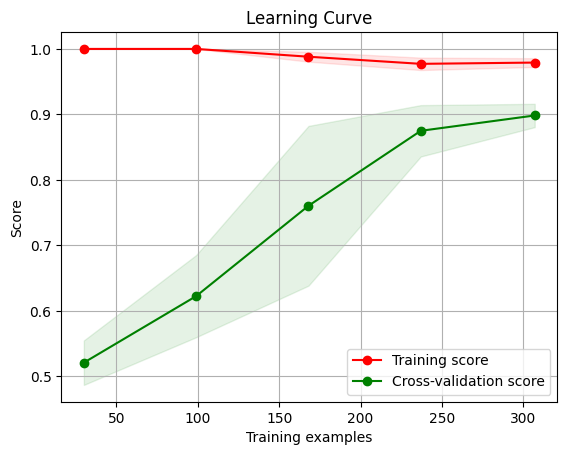

In [57]:
model_gini = RandomForestClassifier(bootstrap = False, criterion = 'gini', max_depth = None, 
                                n_estimators = 20, random_state = 4)

train_curve(model_gini, X, y)

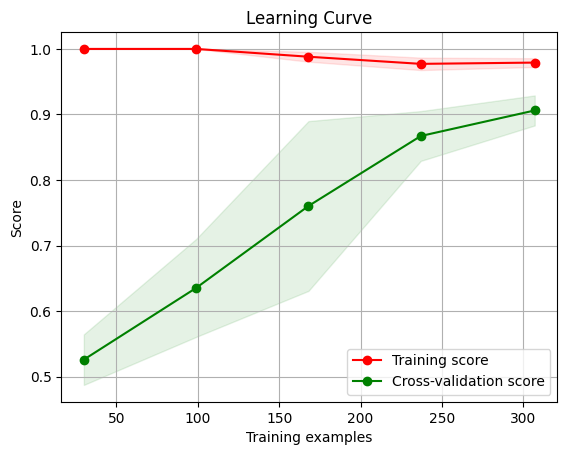

In [58]:
model_entr = RandomForestClassifier(bootstrap = False, criterion = 'entropy', max_depth = None, 
                                n_estimators = 20, random_state = 4)

train_curve(model_entr, X, y)

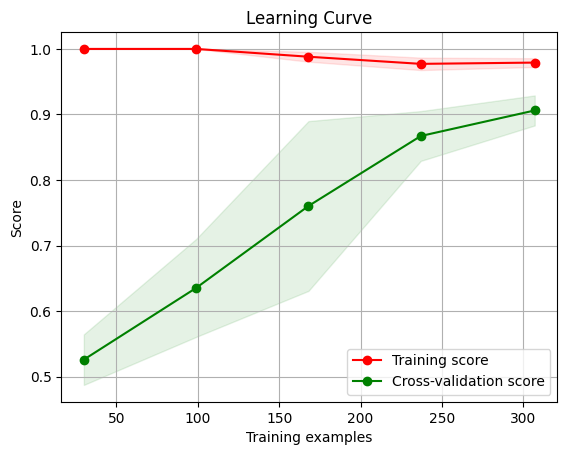

In [59]:
model_log = RandomForestClassifier(bootstrap = False, criterion = 'log_loss', max_depth = None, 
                                n_estimators = 20, random_state = 4)

train_curve(model_log, X, y)

In [60]:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = None, max_features = 'log2', random_state = 42, splitter = 'best')
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)
report_dt = classification_report(y_test, y_pred)

print(accuracy_dt)
print(report_dt)

0.8831168831168831
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87        32
         1.0       0.95      0.84      0.89        45

    accuracy                           0.88        77
   macro avg       0.88      0.89      0.88        77
weighted avg       0.89      0.88      0.88        77



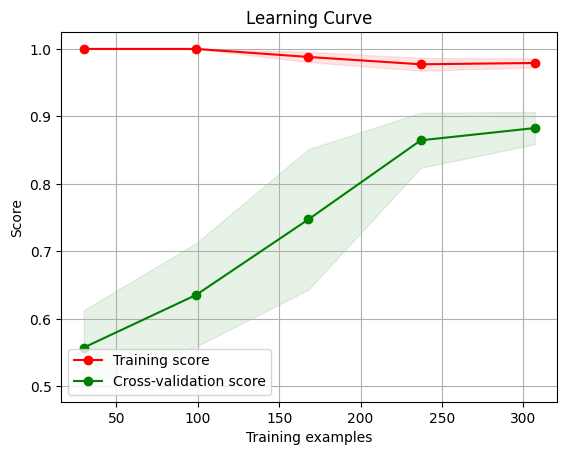

In [61]:
dt_model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = None, max_features = 'log2', random_state = 42, splitter = 'best')

train_curve(dt_model_gini, X, y)

In [62]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
report_svm = classification_report(y_test, y_pred)
conf_svm = confusion_matrix(y_test, y_pred)

print(accuracy_svm)
print(report_svm)

0.7272727272727273
              precision    recall  f1-score   support

         0.0       0.74      0.53      0.62        32
         1.0       0.72      0.87      0.79        45

    accuracy                           0.73        77
   macro avg       0.73      0.70      0.70        77
weighted avg       0.73      0.73      0.72        77



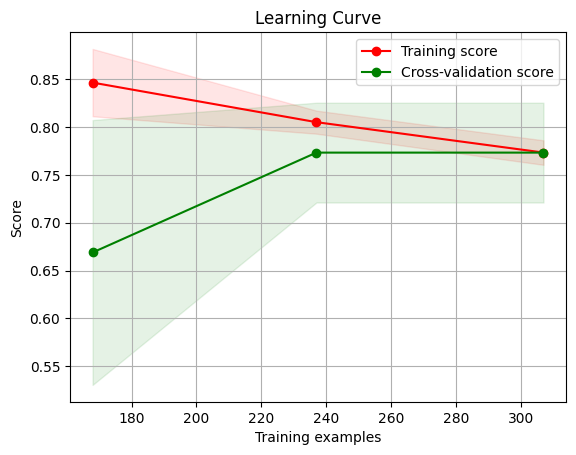

In [63]:
train_curve(svm_model, X, y)

In [221]:
model = Sequential()
model.add(Dense(20, activation='tanh', input_dim=8))
model.add(Dense(1, activation='sigmoid'))

In [222]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 20)                180       
                                                                 
 dense_33 (Dense)            (None, 1)                 21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [223]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [226]:
tb_callback = TensorBoard(log_dir='./logs4', histogram_freq=1)

In [227]:
model.fit(X_train, y_train, epochs=30, callbacks=[tb_callback], validation_data=(X_test, y_test))

Epoch 1/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.5134 - accuracy: 0.8438

10/10 [==============================] - 0s 13ms/step - loss: 0.5286 - accuracy: 0.8111 - val_loss: 0.5341 - val_accuracy: 0.7792
Epoch 2/30
10/10 [==============================] - 0s 7ms/step - loss: 0.5245 - accuracy: 0.8078 - val_loss: 0.5321 - val_accuracy: 0.7922
Epoch 3/30
10/10 [==============================] - 0s 7ms/step - loss: 0.5205 - accuracy: 0.8078 - val_loss: 0.5295 - val_accuracy: 0.8052
Epoch 4/30
10/10 [==============================] - 0s 7ms/step - loss: 0.5170 - accuracy: 0.8111 - val_loss: 0.5276 - val_accuracy: 0.8052
Epoch 5/30
10/10 [==============================] - 0s 7ms/step - loss: 0.5140 - accuracy: 0.8111 - val_loss: 0.5262 - val_accuracy: 0.8052
Epoch 6/30
10/10 [==============================] - 0s 7ms/step - loss: 0.5104 - accuracy: 0.8111 - val_loss: 0.5244 - val_accuracy: 0.8052
Epoch 7/30
10/10 [==============================] - 0s 7ms/step - loss: 0.5071 - accuracy: 0.8111 - val_loss: 0.5230 - val_accuracy: 0.8052
Epoch 8/30
10/10 [============

In [228]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

3/3 [==============================] - 0s 2ms/step - loss: 0.5056 - accuracy: 0.8052
Test accuracy: 0.8051947951316833


### При такой модели графики обучения:
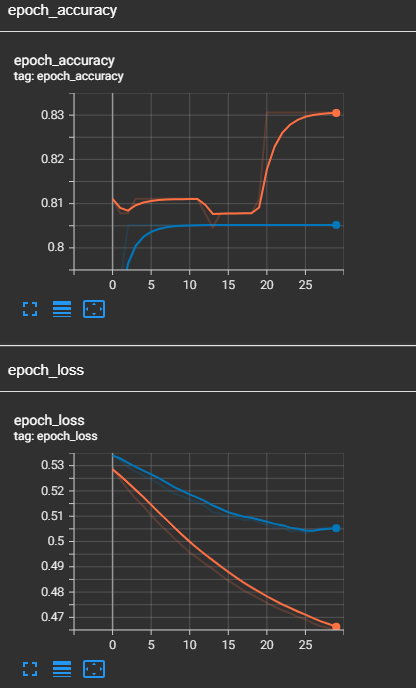

In [214]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=8))
model.add(Dense(1, activation='sigmoid'))

In [215]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 20)                180       
                                                                 
 dense_31 (Dense)            (None, 1)                 21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [217]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
tb_callback_1 = TensorBoard(log_dir='./logs2', histogram_freq=1)
model.fit(X_train, y_train, epochs=30, callbacks=[tb_callback_1], validation_data=(X_test, y_test))

Epoch 1/30


10/10 [==============================] - 1s 18ms/step - loss: 0.5375 - accuracy: 0.8013 - val_loss: 0.5373 - val_accuracy: 0.8182
Epoch 2/30
10/10 [==============================] - 0s 8ms/step - loss: 0.5323 - accuracy: 0.8013 - val_loss: 0.5359 - val_accuracy: 0.8182
Epoch 3/30
10/10 [==============================] - 0s 8ms/step - loss: 0.5286 - accuracy: 0.8013 - val_loss: 0.5358 - val_accuracy: 0.8182
Epoch 4/30
10/10 [==============================] - 0s 8ms/step - loss: 0.5250 - accuracy: 0.8013 - val_loss: 0.5337 - val_accuracy: 0.8182
Epoch 5/30
10/10 [==============================] - 0s 9ms/step - loss: 0.5215 - accuracy: 0.8013 - val_loss: 0.5318 - val_accuracy: 0.8182
Epoch 6/30
10/10 [==============================] - 0s 7ms/step - loss: 0.5183 - accuracy: 0.8013 - val_loss: 0.5319 - val_accuracy: 0.8052
Epoch 7/30
10/10 [==============================] - 0s 8ms/step - loss: 0.5147 - accuracy: 0.8013 - val_loss: 0.5304 - val_accuracy: 0.8052
Epoch 8/30
10/10 [============

In [220]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

3/3 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.8052
Test accuracy: 0.8051947951316833


### Результат обучения такой модели
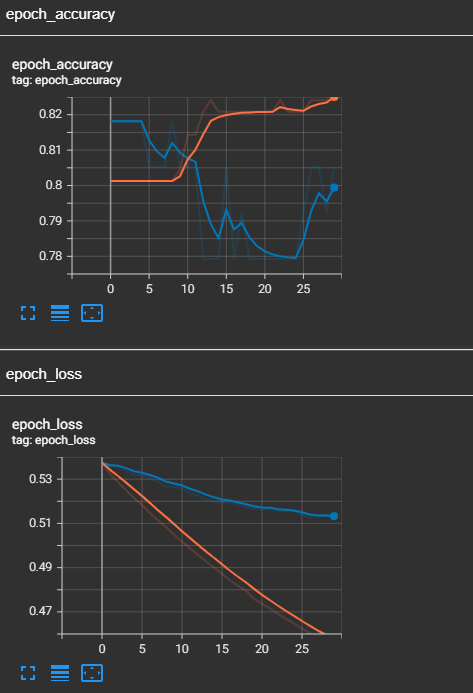

# ИТОГ
### Вариант 1.  Разделение столбцов Marital Status, Occupation, Educational Qualifications на столбцы по их значениям (One-hot encoding). Замена Yes, No на 1 и 0. Замена Female: 0, Male: 1. Замена Negative: 0, Positive: 1. Замена Monthly Income на средние численные значения. 
<li>Random Forest: Test Accuracy: 0.8461538461538461</li>
<li>Decision Tree: Test Accuracy: 0.8718</li>
<li>SVM: Test Accuracy: 0.8590</li>
<li>Logistic Regression: Test Accuracy: 0.8590</li>
<li>Network: Test accuracy: 0.8590</li>

### Вариант 2. Обучение метода случайного леса и деревьев принятия решений с помощью LabelEncoder().
<li>Random Forest: Test Accuracy: 0.8717948717948718</li>
<li>Decision Tree: Test Accuracy: 0.8333333333333334</li>

### Вариант 3. Сбалансированный датасет с помощью RandomOverSampler и LabelEncoder().
<li>Random Forest: Test Accuracy: 0.9291338582677166</li>
<li>Decision Tree: Test Accuracy: 0.937007874015748</li>
<li>SVM: Test Accuracy: 0.8346456692913385</li>
<li>Logistic Regression: Test Accuracy: 0.8346456692913385</li>
<li>Network: Test accuracy: 0.8589743375778198</li>

### Вариант 4. StandartScaler() и LabelEncoder() и замена столбцов вручную и RandomOverSampler() и удалением дубликатов
<li>Random Forest: Test Accuracy: 0.8831168831168831</li>
<li>Decision Tree: Test Accuracy: 0.8831168831168831</li>
<li>SVM: Test Accuracy: 0.7272727272727273</li>
<li>Network: Test accuracy: 0.8051947951316833</li>

### Лучше всего себя показал Random Forest на варианте 3 в плане точности. Decision Tree на варианте 3. SVM и Logistic Regression часто показывали одинаковые результаты точности, наибольшая точность достигнута на варианте 1 и 2. Нейронная сеть показала наивысший результат на вариантах 1 и 3.

#### Таким образом, данный датасет необходим для предсказания отзывов (положительный или отрицательный) за доставку заказов по личной информации о покупателях. В зависимости от подхода к данным различные модели показали себя по-разному. Но наивысшая точность была достигнута с помощью метода случайных лесов с помощью метода подбора наилучших параметров GridSearch.
#### В датасете было выявлено, что отрицательные отзывы чаще всего оставляли клиенты с доходом от 25000 до 50000. А также женщины оставляли отрицательные отзывы чаще, чем мужчины, насчет положительных отзывов - такая же ситуация. Также отрицательные отзывы оставляли чаще всего выпускники (graduate). Был выявлен сильный дисбаланс данных, поэтому был применен метод RandomOverSampler() создающий искусственные данные с целью их сбалансировать.